<a href="https://colab.research.google.com/github/KomilovQobiljon/databasemanagementUNI/blob/main/Week13DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [2]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
        );
    """)

In [3]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [4]:
with con:
    con.executemany(sql, data)

In [5]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [6]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [7]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill 
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [8]:
df.to_sql('USER_SKILL', con)

In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [10]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [11]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-12-06


In [12]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-12-31


In [13]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [14]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [15]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature); 

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [16]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-24 21:04:29,20.238966138104995
2021-07-25 21:04:29,23.817231708288507
2021-07-26 21:04:29,24.914511300907137
2021-07-27 21:04:29,22.27893578859712
2021-07-28 21:04:29,24.80614375111095


In [17]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-24 21:04:29.164416,20.238966138104995
2021-07-25 21:04:29.164416,23.817231708288507
2021-07-26 21:04:29.164416,24.914511300907137
2021-07-27 21:04:29.164416,22.27893578859712
2021-07-28 21:04:29.164416,24.80614375111095
2021-07-29 21:04:29.164416,20.831727790445026
2021-07-30 21:04:29.164416,21.68412337304752
2021-07-31 21:04:29.164416,24.017695566778556
2021-08-01 21:04:29.164416,19.719510699693426
2021-08-02 21:04:29.164416,25.172989491283793


In [18]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-24 21:04:29.164416,20.238966138104995
2021-07-25 21:04:29.164416,23.817231708288507
2021-07-26 21:04:29.164416,24.914511300907137
2021-07-27 21:04:29.164416,22.27893578859712
2021-07-28 21:04:29.164416,24.80614375111095
2021-07-29 21:04:29.164416,20.831727790445026
2021-07-30 21:04:29.164416,21.68412337304752
2021-07-31 21:04:29.164416,24.017695566778556
2021-08-01 21:04:29.164416,19.719510699693426
2021-08-02 21:04:29.164416,25.172989491283793


In [19]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.93125122124581,25.94905680431591,18.029502844407194
2022,21.97352619747995,25.983882147598194,18.01965459987883


In [20]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-24 21:04:29', '2021-07-25 21:04:29',
               '2021-07-26 21:04:29', '2021-07-27 21:04:29',
               '2021-07-28 21:04:29', '2021-07-29 21:04:29',
               '2021-07-30 21:04:29', '2021-07-31 21:04:29',
               '2021-08-01 21:04:29', '2021-08-02 21:04:29',
               ...
               '2022-11-26 21:04:29', '2022-11-27 21:04:29',
               '2022-11-28 21:04:29', '2022-11-29 21:04:29',
               '2022-11-30 21:04:29', '2022-12-01 21:04:29',
               '2022-12-02 21:04:29', '2022-12-03 21:04:29',
               '2022-12-04 21:04:29', '2022-12-05 21:04:29'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

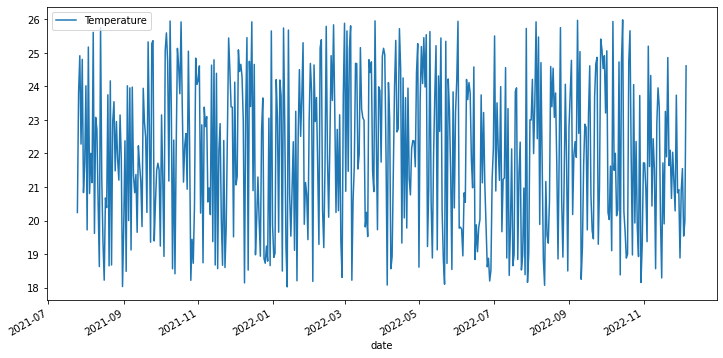

In [21]:
df.plot(figsize=(12, 6))